# Project: Wrangling and Analyze Data

In [1]:
#improting libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
import re
import requests
import os
%matplotlib inline

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
df1 = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
df1.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open (os.path.join(os.curdir,'image_predictions.tsv'), mode='wb') as file:
    file.write(r.content)

In [5]:
df2 = pd.read_csv('image_predictions.tsv', sep='\t')

In [6]:
df2.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [7]:
with open('tweet-json.txt') as f:
    tweet_api = pd.DataFrame((json.loads(line) for line in f), columns = ['id', 'retweet_count', 'favorite_count'])

In [8]:
tweet_api.rename(columns={'id':'tweet_id'},inplace=True)

In [9]:
tweet_api.head(5)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



##### First, We will assess Twitter archive data (df1)

In [10]:
df1.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
df1['tweet_id'].duplicated().sum()

0

In [13]:
df1['tweet_id'].isnull().sum()

0

In [14]:
df1['name'].value_counts()

None       745
a           55
Charlie     12
Lucy        11
Oliver      11
Cooper      11
Penny       10
Lola        10
Tucker      10
Bo           9
Winston      9
the          8
Sadie        8
Bailey       7
Daisy        7
Toby         7
an           7
Buddy        7
Scout        6
Rusty        6
Bella        6
Stanley      6
Milo         6
Oscar        6
Koda         6
Dave         6
Jack         6
Jax          6
Leo          6
Oakley       5
          ... 
Sid          1
Harnold      1
Kota         1
life         1
Mookie       1
Tanner       1
Bruno        1
Gert         1
Asher        1
Dot          1
Ralphus      1
Karma        1
Jerome       1
DayZ         1
Meera        1
Charl        1
Cecil        1
Kona         1
Noosh        1
Tassy        1
Randall      1
Chase        1
Carbon       1
Banjo        1
Bobble       1
Damon        1
Perry        1
Clybe        1
Samsom       1
Daniel       1
Name: name, Length: 957, dtype: int64

In [15]:
df1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [16]:
df1['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [17]:
df1['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [18]:
df1['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [19]:
df1['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [20]:
df1['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [21]:
df1['expanded_urls'].isnull().sum()

59

In [22]:
df1['expanded_urls'].duplicated().sum()

137

In [23]:
df1['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

##### Second, we will assess Image predction file (df2)

In [24]:
df2.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [26]:
df2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [27]:
df2['jpg_url'].duplicated().sum()

66

In [28]:
df2['jpg_url'].isnull().sum()

0

In [29]:
df2['p1'].value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Siberian_husky                20
German_shepherd               20
Staffordshire_bullterrier     20
Cardigan                      19
web_site                      19
beagle                        18
Maltese_dog                   18
Eskimo_dog                    18
teddy                         18
Shetland_sheepdog             18
Lakeland_terrier              17
Shih-Tzu                      17
Rottweiler                    17
Italian_greyhound             16
kuvasz                        16
          

In [30]:
df2['p2'].value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
Chesapeake_Bay_retriever           41
French_bulldog                     41
toy_poodle                         37
cocker_spaniel                     34
miniature_poodle                   33
Siberian_husky                     33
beagle                             28
Pembroke                           27
collie                             27
Eskimo_dog                         27
kuvasz                             26
Italian_greyhound                  22
Pekinese                           21
American_Staffordshire_terrier     21
toy_terrier                        20
malinois                           20
Samoyed                            20
chow                               20
miniature_pinscher                 20
Boston_bull                        19
Norwegian_elkhound                 19
Staffordshir

In [31]:
df2['p3'].value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
Staffordshire_bullterrier         32
cocker_spaniel                    31
beagle                            31
Pekinese                          29
toy_poodle                        29
Pomeranian                        29
Chesapeake_Bay_retriever          27
Pembroke                          27
Great_Pyrenees                    27
French_bulldog                    26
malamute                          26
American_Staffordshire_terrier    24
Cardigan                          23
pug                               23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
Boston_bull                       17
Shetland_sheepdog                 17
d

##### Last, we will assess twitter api data (tweet_api)

In [32]:
tweet_api.head(5)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [33]:
tweet_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [34]:
tweet_api.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [35]:
tweet_api['tweet_id'].duplicated().sum()

0

### Quality issues
1. Timestamp should be in datetime type

2. The columns (doggo, floofer, pupper, and puppo) has missing values as (None) instead of NaN!

3. we have duplicated jpg_url which is about 66 record

4. source column is in HTML tags which is hard to understand at first look

5. in expanded_urls column, we have null values and duplicated values.

6. some of the names in name column are wierd such as :(a, an, very)

7. some of the records, the denominator is not 10.

8. Some of the records are retweets, so we should remove it.

9. remove unwanted columns such as img_num in df2 (image prediction file)

### Tidiness issues
1. merging type of dogs or stage of dogs into one column, so we reduce the dimensionality of our dataframe.

2. combine all the dataframes into one dataframe

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [36]:
# Make copies of original pieces of data
df1_clean = df1.copy()
df2_clean = df2.copy()
tweet_api_clean = tweet_api.copy()

### Issue #1:

#### Timestamp should be in datetime type

#### Code

In [37]:
df1_clean['timestamp'] = pd.to_datetime(df1_clean['timestamp'])

#### Test

In [38]:
#Check if the type of timestamp changed or not
df1_clean.dtypes

tweet_id                               int64
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                  float64
retweeted_status_user_id             float64
retweeted_status_timestamp            object
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
dtype: object

### Issue #2:

#### The columns doggo, floofer, pupper, and puppo has missing values as (None) instead of NaN!

#### Code

In [39]:
df1_clean['doggo'].replace('None','', inplace=True)
df1_clean['pupper'].replace('None','', inplace=True)
df1_clean['floofer'].replace('None','', inplace=True)
df1_clean['puppo'].replace('None','', inplace=True)

#### Test

In [40]:
df1_clean['doggo'].value_counts()

         2259
doggo      97
Name: doggo, dtype: int64

In [41]:
df1_clean['pupper'].value_counts()

          2099
pupper     257
Name: pupper, dtype: int64

In [42]:
df1_clean['floofer'].value_counts()

           2346
floofer      10
Name: floofer, dtype: int64

In [43]:
df1_clean['puppo'].value_counts()

         2326
puppo      30
Name: puppo, dtype: int64

### Issue #3:

#### we have duplicated jpg_url which is about 66 record

#### Code

In [44]:
df2_clean = df2_clean.drop_duplicates(subset=['jpg_url'], keep = 'first')

#### Test

In [45]:
df2_clean['jpg_url'].duplicated().sum()

0

### Issue #4:

#### source column is in HTML tags which is hard to understand at first look

#### Code

In [46]:
df1_clean['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [47]:
df1_clean['source'] = df1_clean['source'].str.extract('(<a href="https?)(:\/\/)(.+)(">)(.+)(<\/a)', expand = True)[4];


#### Test

In [48]:
df1_clean.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

### Issue #5:

#### in expanded_urls column, we have null values and duplicated values.

#### Code

In [49]:
df1_clean.drop_duplicates(subset='expanded_urls', inplace=True, keep='first')

In [50]:
df1_clean['expanded_urls'].dropna(how = 'all', inplace=True)

#### Test

In [51]:
df1_clean['expanded_urls'].duplicated().sum()

0

In [52]:
df1_clean['expanded_urls'].isnull().sum()

0

### Issue #6:

#### some of the names in name column are wierd such as :(a, an, very)

#### Code

In [63]:
mask = df1_clean.name.str.contains('^[a-z]', regex = True)
df1_clean[mask].name.value_counts().sort_index()

actually        2
all             1
getting         2
his             1
incredibly      1
infuriating     1
life            1
mad             1
not             2
officially      1
old             1
one             4
unacceptable    1
very            3
Name: name, dtype: int64

In [53]:
df1_clean['name'] = df1_clean.name.replace(['a','an','o','my','me', 'by', 'such','the', 'quite','light', 'just','space', 'this'], 'None', inplace=False)

In [64]:
lower_dog_name_index = df1_clean[df1_clean.name.str.islower()].index

In [65]:
df1_clean.drop(lower_dog_name_index, inplace=True)
df1_clean.shape

(2000, 18)

#### Test

In [66]:
df1_clean.name.value_counts()

None          670
Lucy           11
Charlie        10
Cooper          9
Tucker          9
Penny           9
Oliver          9
Sadie           8
Daisy           7
Toby            7
Winston         7
Lola            7
Koda            6
Oscar           6
Stanley         6
Bailey          6
Bella           6
Jax             6
Scout           5
Dave            5
Milo            5
Chester         5
Bentley         5
Louis           5
Rusty           5
Bo              5
Jerry           4
Leo             4
Chip            4
Dexter          4
             ... 
Bruno           1
Tanner          1
Brandonald      1
Jazz            1
Jay             1
Meera           1
DayZ            1
Gustav          1
Glacier         1
Mutt            1
Stefan          1
Rontu           1
Eugene          1
Dale            1
Shooter         1
Sprinkles       1
Zooey           1
Hubertson       1
Tebow           1
Butters         1
Ozzie           1
Olaf            1
Winifred        1
Moreton         1
William   

### Issue #7:

#### Rating denominator not equal 10

#### Code

In [67]:
wrong_demoniator_df = df1_clean.loc[df1_clean.rating_denominator != 10]

In [68]:
df1_clean.drop(wrong_demoniator_df.index, axis=0, inplace=True)

#### Test

In [69]:
df1_clean.loc[df1_clean.rating_denominator != 10].count()

tweet_id                      0
in_reply_to_status_id         0
in_reply_to_user_id           0
timestamp                     0
source                        0
text                          0
retweeted_status_id           0
retweeted_status_user_id      0
retweeted_status_timestamp    0
expanded_urls                 0
rating_numerator              0
rating_denominator            0
name                          0
doggo                         0
floofer                       0
pupper                        0
puppo                         0
dog_type                      0
dtype: int64

### Issue #8:

#### Some of the records are retweets, so we should remove it.

#### Code

In [70]:
df1_clean = df1_clean[df1_clean['retweeted_status_id'].isnull()]

#### Test

In [71]:
df1.retweeted_status_id.isnull().sum()

2175

### Tidiness #1:

##### merging type of dogs or stage of dogs into one column, so we reduce the dimensionality of our dataframe.

Code

In [72]:
for index, column in df1_clean.iterrows():
    for word in ['doggo', 'floofer', 'puppo', 'pupper']:
        if word.lower() in str(df1_clean.loc[index, 'text']).lower():
            df1_clean.loc[index, 'dog_type'] = word.title()

Test

In [73]:
df1_clean.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_type
255,844223788422217728,NaN,NaN,2017-03-21 16:26:50,Twitter for iPhone,This is Margo. She just dug pup a massive hole...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/844223788...,12,10,Margo,,,,,NaN
1528,690348396616552449,NaN,NaN,2016-01-22 01:40:58,Vine - Make a Scene,This is Oddie. He's trying to communicate. 12/...,NaN,NaN,NaN,https://vine.co/v/iejBWerY9X2,12,10,Oddie,,,,,NaN
229,848212111729840128,NaN,NaN,2017-04-01 16:35:01,Twitter for iPhone,This is Jerry. He's doing a distinguished tong...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/848212111...,6,10,Jerry,,,,,NaN
954,751793661361422336,NaN,NaN,2016-07-09 15:02:31,Vine - Make a Scene,This is Fred. He's having one heck of a summer...,NaN,NaN,NaN,https://vine.co/v/5W5YHdTJvaV,11,10,Fred,,,,,NaN
1959,673576835670777856,NaN,NaN,2015-12-06 18:56:46,Twitter for iPhone,Sun burnt dog here. Quite large. Wants to prom...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673576835...,7,10,None,,,,,NaN
94,874012996292530176,NaN,NaN,2017-06-11 21:18:31,Twitter for iPhone,This is Sebastian. He can't see all the colors...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/874012996...,13,10,Sebastian,,,,puppo,Puppo
1761,678675843183484930,NaN,NaN,2015-12-20 20:38:24,Twitter for iPhone,Exotic pup here. Tail long af. Throat looks sw...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678675843...,2,10,None,,,,,NaN
648,793120401413079041,NaN,NaN,2016-10-31 16:00:13,Twitter for iPhone,This is Robin. She's desperately trying to do ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793120401...,11,10,Robin,,,,,NaN
670,789986466051088384,NaN,NaN,2016-10-23 00:27:05,Twitter for iPhone,This is Happy. He's a bathtub reviewer. Seems ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/789986466...,12,10,Happy,,,,,NaN
981,749417653287129088,NaN,NaN,2016-07-03 01:41:06,Twitter for iPhone,This is Finn. He's the most unphotogenic puppe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749417653...,11,10,Finn,,,pupper,,Pupper


### Back to quality Issue #9:

In [74]:
df1_clean.dog_type.value_counts()

Pupper     235
Doggo       71
Puppo       27
Floofer     10
Name: dog_type, dtype: int64

#### remove unwanted columns such as img_num in df2 (image prediction file)

#### Code

In [75]:
#in df1_clean 
df1_clean.drop(columns=['in_reply_to_status_id', 
                        'in_reply_to_user_id',
                        'retweeted_status_id',
                        'retweeted_status_user_id',
                        'retweeted_status_timestamp',
                        'doggo', 'floofer', 'pupper', 'puppo'
                       ], axis=1, inplace=True)

In [76]:
#in df2_clean
df2_clean.drop(columns=['img_num'], axis=1, inplace=True)

#### Test

In [77]:
df1_clean.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN


In [78]:
df2_clean.head(2)

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


### Tidiness #2:

##### merging all the dataframes into one dataframe

Code

In [79]:
final_df_clean = pd.merge(df1_clean, tweet_api_clean,how='inner', on = 'tweet_id').copy()

In [80]:
final_df_clean = pd.merge(final_df_clean, df2_clean, how = 'inner', on = 'tweet_id').copy()

Test

In [81]:
final_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1882 entries, 0 to 1881
Data columns (total 21 columns):
tweet_id              1882 non-null int64
timestamp             1882 non-null datetime64[ns]
source                1882 non-null object
text                  1882 non-null object
expanded_urls         1882 non-null object
rating_numerator      1882 non-null int64
rating_denominator    1882 non-null int64
name                  1882 non-null object
dog_type              310 non-null object
retweet_count         1882 non-null int64
favorite_count        1882 non-null int64
jpg_url               1882 non-null object
p1                    1882 non-null object
p1_conf               1882 non-null float64
p1_dog                1882 non-null bool
p2                    1882 non-null object
p2_conf               1882 non-null float64
p2_dog                1882 non-null bool
p3                    1882 non-null object
p3_conf               1882 non-null float64
p3_dog                1882 non-n

In [82]:
final_df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,retweet_count,...,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,8853,...,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,6514,...,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,4328,...,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,8964,...,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,9774,...,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [83]:
final_df_clean.duplicated().sum()

0

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [84]:
final_df_clean.to_csv('twitter_archive_master.csv', encoding = 'utf-8')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [85]:
df = pd.read_csv('twitter_archive_master.csv')

### Insights:

### 1: What are the most frequent dog names?

In [91]:
df['name'].value_counts()[:6]

None       593
Charlie     10
Lucy        10
Cooper       9
Penny        9
Oliver       9
Name: name, dtype: int64

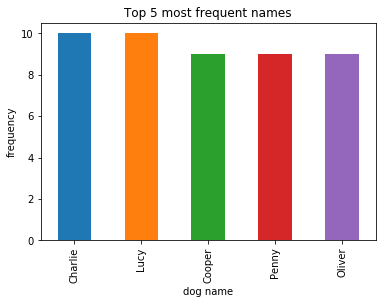

In [87]:
df['name'].value_counts()[1:6].plot(kind = 'bar')
plt.xlabel('dog name')
plt.ylabel('frequency')
plt.title('Top 5 most frequent names');
plt.savefig('names.jpg')

> #### the most frequent names is 
> 1. Lucy
> 2. Charlie
> 3. Tucker
> 4. Penny
> 5. Cooper

### 2: what is the most source used in tweeting?

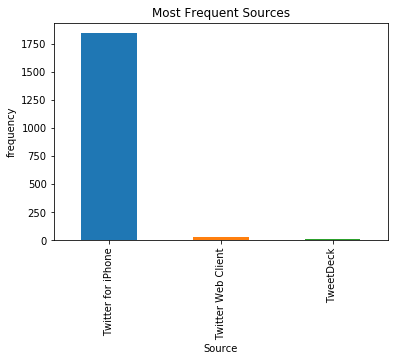

In [88]:
df['source'].value_counts().plot(kind = 'bar')
plt.xlabel('Source')
plt.ylabel('frequency')
plt.title('Most Frequent Sources');
plt.savefig('source.jpg')

> ##### as we can see, the most freuqent source are from iphone 

### 3: What is the most popular dog type?

In [89]:
df['dog_type'].value_counts()

Pupper     216
Doggo       60
Puppo       26
Floofer      8
Name: dog_type, dtype: int64

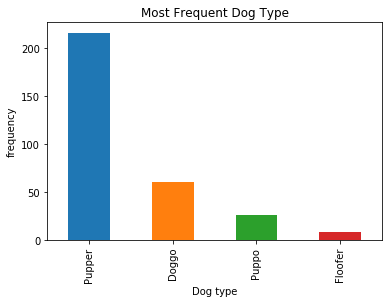

In [90]:
df['dog_type'].value_counts().plot(kind = 'bar')
plt.xlabel('Dog type')
plt.ylabel('frequency')
plt.title('Most Frequent Dog Type');
plt.savefig('type.jpg')

> #### As we can see, the most frequent dog type is pupper then doggo then puppo then floofer.